<a href="https://colab.research.google.com/github/japashira/GS_AbrigAPP_IA/blob/main/GS_AbrigAPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulação dos Dados de Sensores

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 300
data = {
    'nivel_agua_cm': np.random.normal(100, 30, n).clip(0),
    'chuva_mm': np.random.normal(50, 20, n).clip(0),
    'umidade_solo_pct': np.random.normal(70, 15, n).clip(0, 100),
    'temperatura_C': np.random.normal(25, 5, n)
}

df = pd.DataFrame(data)

def classificar_risco(row):
    if row['nivel_agua_cm'] > 130 or (row['chuva_mm'] > 90 and row['umidade_solo_pct'] > 85):
        return 'alto'
    elif row['nivel_agua_cm'] > 100 or row['chuva_mm'] > 70:
        return 'medio'
    else:
        return 'baixo'

df['risco'] = df.apply(classificar_risco, axis=1)
df.head()


,nivel_agua_cm,chuva_mm,umidade_solo_pct,temperatura_C,risco
0,114.901425,33.420100,81.354829,26.843367,medio
1,95.852071,38.796379,56.167520,23.033306,baixo
2,119.430656,64.945872,83.044089,25.143724,medio
3,145.690896,62.207405,90.334568,31.392259,alto
4,92.975399,49.581968,76.201524,25.955495,baixo


# Visualização dos Dados

<ipython-input-2-86cbd1f8276a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risco', palette='Set2')


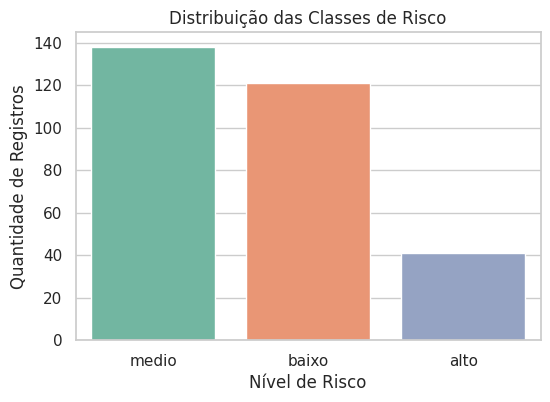

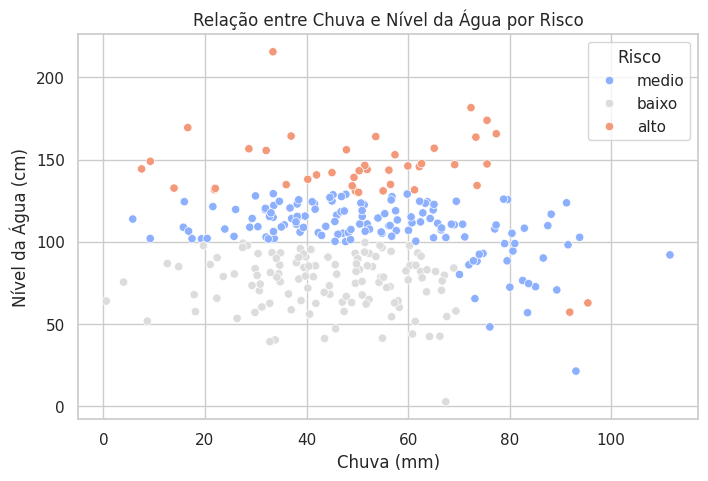

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='risco', palette='Set2')
plt.title('Distribuição das Classes de Risco')
plt.xlabel('Nível de Risco')
plt.ylabel('Quantidade de Registros')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='chuva_mm', y='nivel_agua_cm', hue='risco', palette='coolwarm')
plt.title('Relação entre Chuva e Nível da Água por Risco')
plt.xlabel('Chuva (mm)')
plt.ylabel('Nível da Água (cm)')
plt.legend(title='Risco')
plt.show()


Preparação dos Dados

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separando features e target
X = df[['nivel_agua_cm', 'chuva_mm', 'umidade_solo_pct', 'temperatura_C']]
y = df['risco']

# Codificando a variável de saída
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # baixo=0, medio=1, alto=2

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


# Treinamento do Modelo

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Avaliação do Modelo

Relatório de Classificação:

              precision    recall  f1-score   support

        alto       1.00      1.00      1.00         6
       baixo       0.96      0.96      0.96        24
       medio       0.97      0.97      0.97        30

    accuracy                           0.97        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.97      0.97      0.97        60



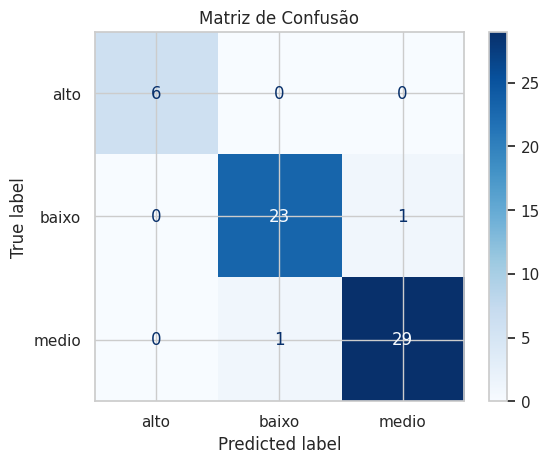

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Previsão
y_pred = modelo.predict(X_test)

# Avaliação
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()


# Previsão com Novos Dados Simulados

In [6]:
# Novos dados (ex: simulando sensores em tempo real)
novo_dado = pd.DataFrame({
    'nivel_agua_cm': [140],
    'chuva_mm': [95],
    'umidade_solo_pct': [90],
    'temperatura_C': [26]
})

# Previsão
risco_previsto = modelo.predict(novo_dado)
risco_previsto_label = le.inverse_transform(risco_previsto)
print("🔔 ALERTA: Risco previsto =", risco_previsto_label[0].upper())


🔔 ALERTA: Risco previsto = ALTO


Exportando Resultado como JSON

In [7]:
import json

resultado_json = {
    "dados_sensores": novo_dado.iloc[0].to_dict(),
    "risco_previsto": risco_previsto_label[0]
}

# Exibir como string JSON formatada
print(json.dumps(resultado_json, indent=4, ensure_ascii=False))


{
    "dados_sensores": {
        "nivel_agua_cm": 140,
        "chuva_mm": 95,
        "umidade_solo_pct": 90,
        "temperatura_C": 26
    },
    "risco_previsto": "alto"
}


Salvando o Modelo Treinado

In [8]:
import joblib

# Salvar modelo e encoder
joblib.dump(modelo, 'modelo_risco_enchente.pkl')
joblib.dump(le, 'label_encoder_risco.pkl')

print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!
